In [1]:
from bs4 import BeautifulSoup
import re
from urllib import urlopen
from datetime import datetime
from PIL import Image
from cStringIO import StringIO

In [2]:
def parse_yahoo_jp_stock_diagram(stock_id):
    diag_url = u'http://chart.yahoo.co.jp/?code={}.T&tm=1y&type=c&log=off&size=n&over=m65,m130,s&add=v&comp'
    try:
        img = Image.open(StringIO(urlopen(diag_url.format(stock_id)).read()))
    except:
        return None
    if img.height < 250:
        return None
    return img

In [3]:
def parse_yahoo_jp_finance(url):
    if url.endswith('.vip'):
        raise ValueError('Cannot parse vip-only pages.')
    html = urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(html, 'html.parser')
    content = soup.find_all('div', class_='ymuiContainerNopad clearFix s170')[0]
    content = re.sub('\<\/ *?[Bb][Rr]\>', '', re.sub('\<[Bb][Rr]\>', '\n', str(content)))
    content = BeautifulSoup(content, 'html.parser').children.next()
    
    data = {}
    for x in content.find_all('div'):
        x.extract()
    for x in content.find_all('ul'):
        x.extract()
    data['html'] = content
    data['title'] = soup.find_all('h1')[0].text
    data['stock_id'] = [x.text for x in content.find_all('a')]
    data['stock_id'].extend(re.findall('[0-9]{4}/TW', content.text))
    data['stock_id'].extend(re.findall('[0-9]{4}/TW', content.text))
    data['stock_id'].extend(re.findall('[0-9]{4}/TW', content.text))
    data['text'] = content.text
    time_str = soup.find_all('p', class_='ymuiDate')[0].text
    time_str = re.findall(u'([0-9]+)時([0-9]+)分', time_str)[0]
    date_str = re.findall('([12][09][019][0-9])([01][0-9])([0-3][0-9])', url)[0]
    data['date'] = datetime.strptime('-'.join(date_str + time_str), '%Y-%m-%d-%H-%M')
    return data

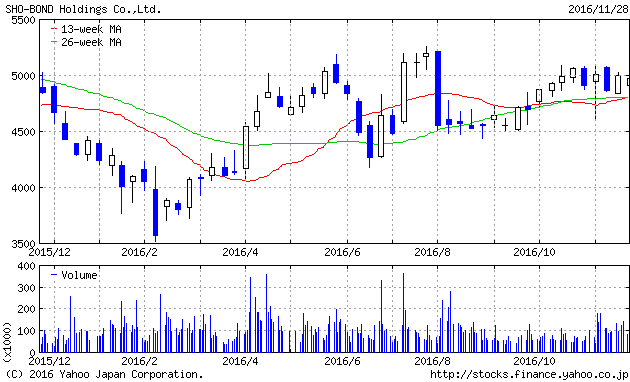

In [4]:
parse_yahoo_jp_stock_diagram('1414')

In [5]:
url = 'http://news.finance.yahoo.co.jp/detail/20161129-00000194-stkms-stocks'
d = parse_yahoo_jp_finance(url)
print d['date']
print d['title']
print d['stock_id']
print d['text']

2016-11-29 15:37:00
本日の【ゴールデンクロス／デッドクロス】引け　GC＝ 97 銘柄　DC＝ 35 銘柄　(11月29日)
[u'9432', u'2914', u'9531', u'1878', u'3625', u'8984', u'7240', u'3923', u'9509', u'6965', u'6258', u'6727', u'3101', u'6428', u'6324', u'6134', u'4924', u'4549', u'8973', u'3309', u'5341', u'8088', u'1414', u'3087', u'3333', u'4842', u'3918', u'3909', u'3222', u'3237', u'7780', u'2453', u'3031', u'6862', u'2734', u'7269', u'4523', u'7818', u'7294', u'2698', u'4514', u'6071', u'6013', u'6469', u'9837', u'8887', u'1540', u'3935', u'3418', u'7921']



■11月29日の終値ベースで、5日と25日の移動平均線がゴールデンクロス／デッドクロスした銘柄

●ゴールデンクロス銘柄（市場人気順）　★上昇トレンドに転換した可能性が高い銘柄

　　　 銘柄名　　　　　　　　　　株価　 前日比 (比率)　　　5日移動平均 25日移動平均
<9432> 日本電信電話　　　　　　　4610　　　 -3 ( -0.1％) 　　　 4538.8　　　 4502.8
<2914> ＪＴ　　　　　　　　　　　3948 　　 +37 ( +1.0％) 　　　 3896.0　　　 3874.6
<9531> 東京ガス　　　　　　　　 488.2　　 -5.7 ( -1.2％) 　　　　480.8　　　　479.2
<1878> 大東建託　　　　　　　　 17545　　　 -5 ( -0.0％) 　　　17212.0　　　17171.0
<3625> テックファム　　　　　　　1912 　　 -26 ( -1.3％) 　　　 1895.2　　　 1882.8
<8984> ハウスリート　　　　　　284500 　 +